# Tools for Analyzing Time Series of Satellite Imagery (TATSSI)

In [1]:
import os
import sys

sys.path.append(os.path.join(os.path.expanduser('~'), 'Projects', 'TATSSI'))

# TATSSI Time Series Generator
from TATSSI.time_series.generator import Generator

# Notebook helpers
from TATSSI.notebooks.helpers.utils import PlotTimeSeries

## Generate time series for MODIS data aquired previously

In the TATSSI Downloaders demonstrator we downloaded some MODIS data, the [MOD13A2.006](https://lpdaac.usgs.gov/products/mod13a2v006/) product for 2017. This product contains several layers including the EVI and NDVI, at 1km every 16 days, as well as associated Quality Assessment flags.

TATSSI can create a time series for this dataset. The default behavior is:

1. For every file in the data directory that matches the product:
  - Will import each band or subdataset to the internal TATSSI format - Cloud Optimized GeoTiff [(COG)](https://www.cogeo.org/)


2. For each QA layer associated to the product:
  - Wil import it to the internal TATSSI format and perform the QA decoding
  
3. For each band or subdataset and associated QA layers
  - Will create [GDAL VRTs](https://www.gdal.org/gdal_vrttut.html) layer stacks

to loop evert each file and each band or subdatasets and create the corresponding time series. The required parameters are the location of the data and the product.

In [2]:
# Set data directory
DataDir = '/home/glopez/Projects/TATSSI/data/MOD13A2.006'
# Set product, it must match product name in TATSSI catalogue
product_and_version = 'MOD13A2.006'

Using these setings now we can generate the time series:

In [4]:
# Create the time series generator object
tsg = Generator(source_dir = DataDir, product = product_and_version)

In [ ]:
# Generate time series -- if needed
tsg.generate_time_series()

## Explore time series

TATSSI will load the time series into a time series object (ts) that contain two attributes:
- **data**
 - An xarray dataset with variables for all layers in the specified product
 
- **qa**
 - A Python named tuple where every field is the QA layer and the attributes of every QA layer are the decoded QA fields

In [5]:
# Load time series data!
ts = tsg.load_time_series()

In [12]:
# Data
ts.data

<xarray.Dataset>
Dimensions:                                  (latitude: 1200, longitude: 1200, time: 23)
Coordinates:
  * time                                     (time) datetime64[ns] 2018-01-01 ...
  * latitude                                 (latitude) float64 2.223e+06 ...
  * longitude                                (longitude) float64 -1.001e+07 ...
Data variables:
    _1_km_16_days_EVI                        (time, latitude, longitude) int16 ...
    _1_km_16_days_MIR_reflectance            (time, latitude, longitude) int16 ...
    _1_km_16_days_NDVI                       (time, latitude, longitude) int16 ...
    _1_km_16_days_NIR_reflectance            (time, latitude, longitude) int16 ...
    _1_km_16_days_VI_Quality                 (time, latitude, longitude) uint16 ...
    _1_km_16_days_blue_reflectance           (time, latitude, longitude) int16 ...
    _1_km_16_days_composite_day_of_the_year  (time, latitude, longitude) int16 ...
    _1_km_16_days_pixel_reliability        

In [17]:
# QA layers
ts.qa._fields

('qa_1_km_16_days_pixel_reliability', 'qa_1_km_16_days_VI_Quality')

In [19]:
# Decoded QA layers -- each variable is the decoded QA field!
ts.qa.qa_1_km_16_days_VI_Quality

<xarray.Dataset>
Dimensions:                     (latitude: 1200, longitude: 1200, time: 23)
Coordinates:
  * time                        (time) datetime64[ns] 2018-01-01 2018-01-17 ...
  * latitude                    (latitude) float64 2.223e+06 2.223e+06 ...
  * longitude                   (longitude) float64 -1.001e+07 -1.001e+07 ...
Data variables:
    Adjacent_cloud_detected     (time, latitude, longitude) uint16 ...
    Aerosol_Quantity            (time, latitude, longitude) uint16 ...
    Atmosphere_BRDF_Correction  (time, latitude, longitude) uint16 ...
    Land_Water_Mask             (time, latitude, longitude) uint16 ...
    MODLAND                     (time, latitude, longitude) uint16 ...
    Mixed_Clouds                (time, latitude, longitude) uint16 ...
    Possible_shadow             (time, latitude, longitude) uint16 ...
    Possible_snow_ice           (time, latitude, longitude) uint16 ...
    VI_Usefulness               (time, latitude, longitude) uint16 ...

<IPython.core.display.Javascript object>


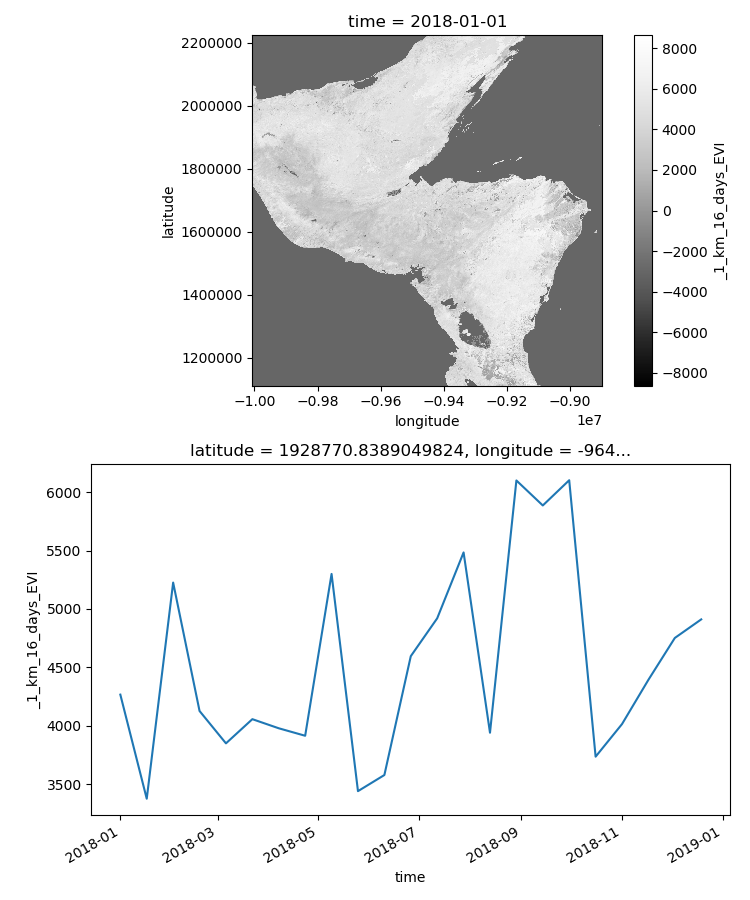

In [21]:
# Time series of EVI
p = PlotTimeSeries()
p.plot(ts.data._1_km_16_days_EVI)

## Create on-the-fly composites

In [ ]:
# Monthly composite
#monthly_mean_EVI = data._1_km_16_days_EVI.groupby('time.month', axis=0).mean()

monthly_mean_EVI = data._1_km_16_days_EVI.resample(time='M').mean('time')

#monthly_max_EVI = data._1_km_16_days_EVI.groupby('time.month').max()
#monthly_min_EVI = data._1_km_16_days_EVI.groupby('time.month').min()

In [ ]:
# What's in the monthly composite
monthly_mean_EVI

In [ ]:
# Plot composite
new_p = PlotTimeSeries()
new_p.plot(monthly_mean_EVI)